In [4]:
import random
import matplotlib.pyplot as plt
import numpy as np

In [125]:
class tank_:
    def __init__(self):
        self.x, self.y = [], []
        self.alpha = np.degrees(30)
        self.v = 2
        self.l_rls = 10
        self.l_paf = 5
        self.dmg = 1000
        self.health = 1000
        self.reload = 5

class ATS_:
    def __init__(self):
        self.x, self.y = [], []
        self.alpha = np.degrees(50)
        self.v = 5
        self.l_rls = 30
        self.l_paf = 5
        self.dmg = 600
        self.health = 100
        self.reload = 10

class battlefiend_:
    def __init__(self, deep = 1):
        self.dct = {
            'Видимость': 1,
            'Влажность': 0,
            'Температура': 273
        }
        self.x, self.y = 100, 100
        self.r_step = 20
        self.end_x, self.end_y = self.x/2, self.y/2
        self.r_start = 50

    def generate(self):
        self.spawn_x_1 = random.randint(0, self.l)
        self.spawn_y_1 = random.randint(0, self.l)
        self.spawn_x_2 = random.randint(0, self.l)
        self.spawn_y_2 = random.randint(0, self.l)

class figth_:
    def __init__(self, tank, ATS, battlefield):
        self.tank = tank
        self.ATS = ATS
        self.battlefield = battlefield

    def generate_data(self):
        self.spawn_x_1, self.spawn_y_1 = 1, 1
        self.spawn_x_2, self.spawn_y_2 = self.battlefield.x - 1, self.battlefield.y - 1
        self.tank.x.append(self.spawn_x_1)
        self.tank.y.append(self.spawn_y_1)
        self.ATS.x.append(self.spawn_x_2)
        self.ATS.y.append(self.spawn_y_2)

    def plot(self):
        fig, ax = plt.subplots()
        plt.rcParams["figure.figsize"] = (6, 6)
        #tank
        plt.scatter(self.tank.x[-1], self.tank.y[-1], marker='s', c='r')
        c1_1 = plt.Circle((self.tank.x[-1], self.tank.y[-1]), radius=self.tank.l_rls, edgecolor='black', fill=False, linestyle=':')
        c1_2 = plt.Circle((self.tank.x[-1], self.tank.y[-1]), radius=self.tank.l_paf, edgecolor='r', fill=False, linestyle='-.')
        ax.add_patch(c1_1)
        ax.add_patch(c1_2)
        #ATS
        plt.scatter(self.ATS.x, self.ATS.y, marker='o', c='b')
        c2_1 = plt.Circle((self.ATS.x[-1], self.ATS.y[-1]), radius=self.ATS.l_rls, edgecolor='black', fill=False, linestyle=':')
        c2_2 = plt.Circle((self.ATS.x[-1], self.ATS.y[-1]), radius=self.ATS.l_paf, edgecolor='b', fill=False, linestyle='-.')
        ax.add_patch(c2_1)
        ax.add_patch(c2_2)
        #field
        c3_1 = plt.Circle((self.battlefield.end_x, self.battlefield.end_y), radius=self.battlefield.r_start, edgecolor='g', fill=False, linestyle='-')
        ax.add_patch(c3_1)
        plt.xlim(0, self.battlefield.x)
        plt.ylim(0, self.battlefield.y)
        plt.grid()
        plt.show()

    def road(self):
        pass

    def shoot(self):
        pass


In [126]:
tank = tank_()
ATS = ATS_()
battlefiend = battlefiend_()
figth = figth_(tank, ATS, battlefiend)
figth.generate_data()

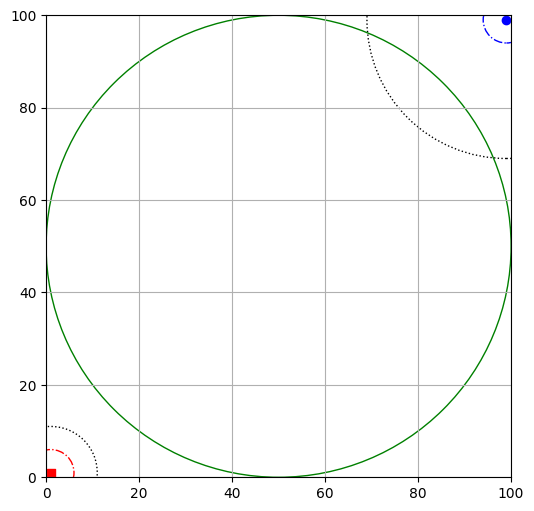

In [127]:
figth.plot()